**Importing all the necessary libraries**

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Loading the dataset**

In [40]:
df = pd.read_csv("C:\\Users\\91701\\Downloads\\heart.csv")

In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [42]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [43]:
df.shape

(303, 14)

In [44]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Statistics of the data**

In [46]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Checking for Null or NaN Values**

In [47]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [48]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Outliers Detection**

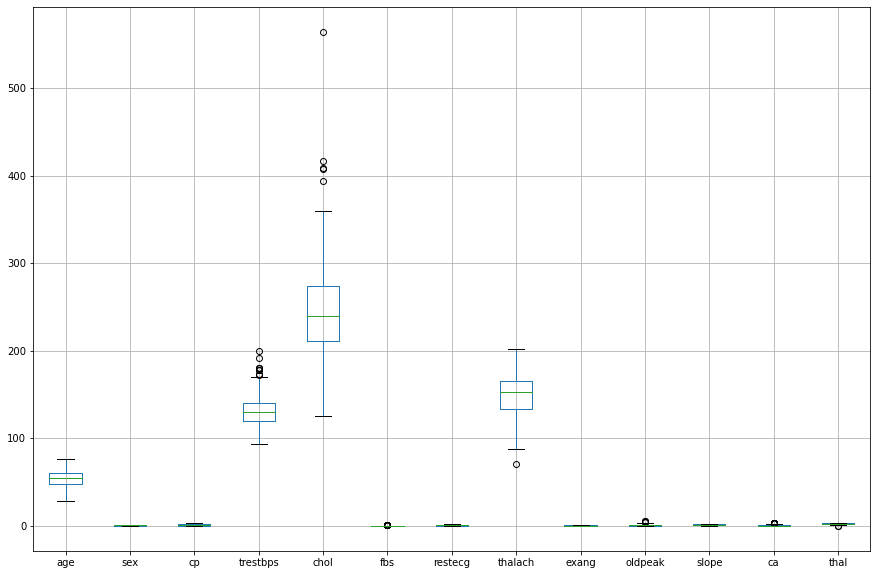

In [49]:
plt.figure(figsize=(15,10))
(df.drop('target',axis=1)).boxplot()
plt.show()

**Outliers are present in the trestbps and chol**

In [50]:
outliers = ['trestbps','chol']
for i in outliers:
    c1 = df[i].quantile(0.95)
    c2 = df[i].quantile(0.05)
    iqr = c1 - c2
    lower = c1 - 1.5*iqr
    upper = c2 + 1.5*iqr
    df = df[(df[i]>lower) & (df[i]<upper)]


In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
df.shape

(297, 14)

**Outliers are removed**

**Exploratory Data Analysis**

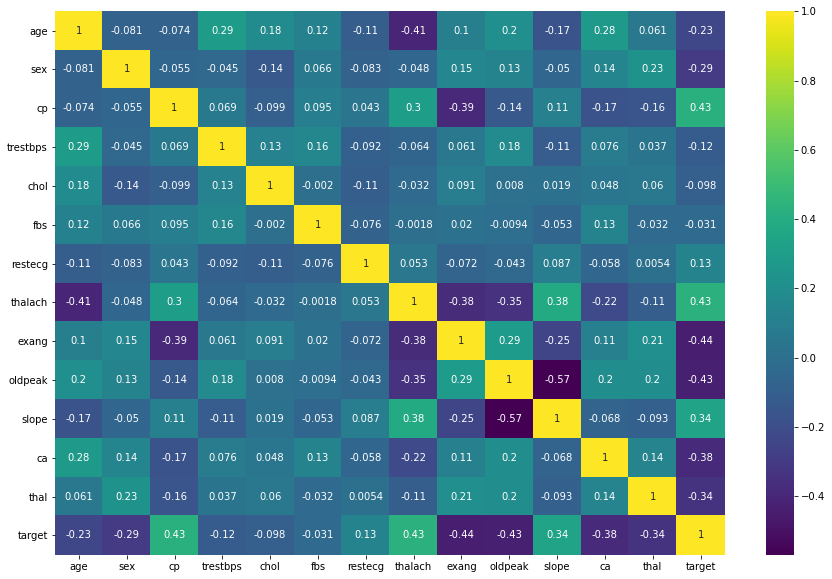

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

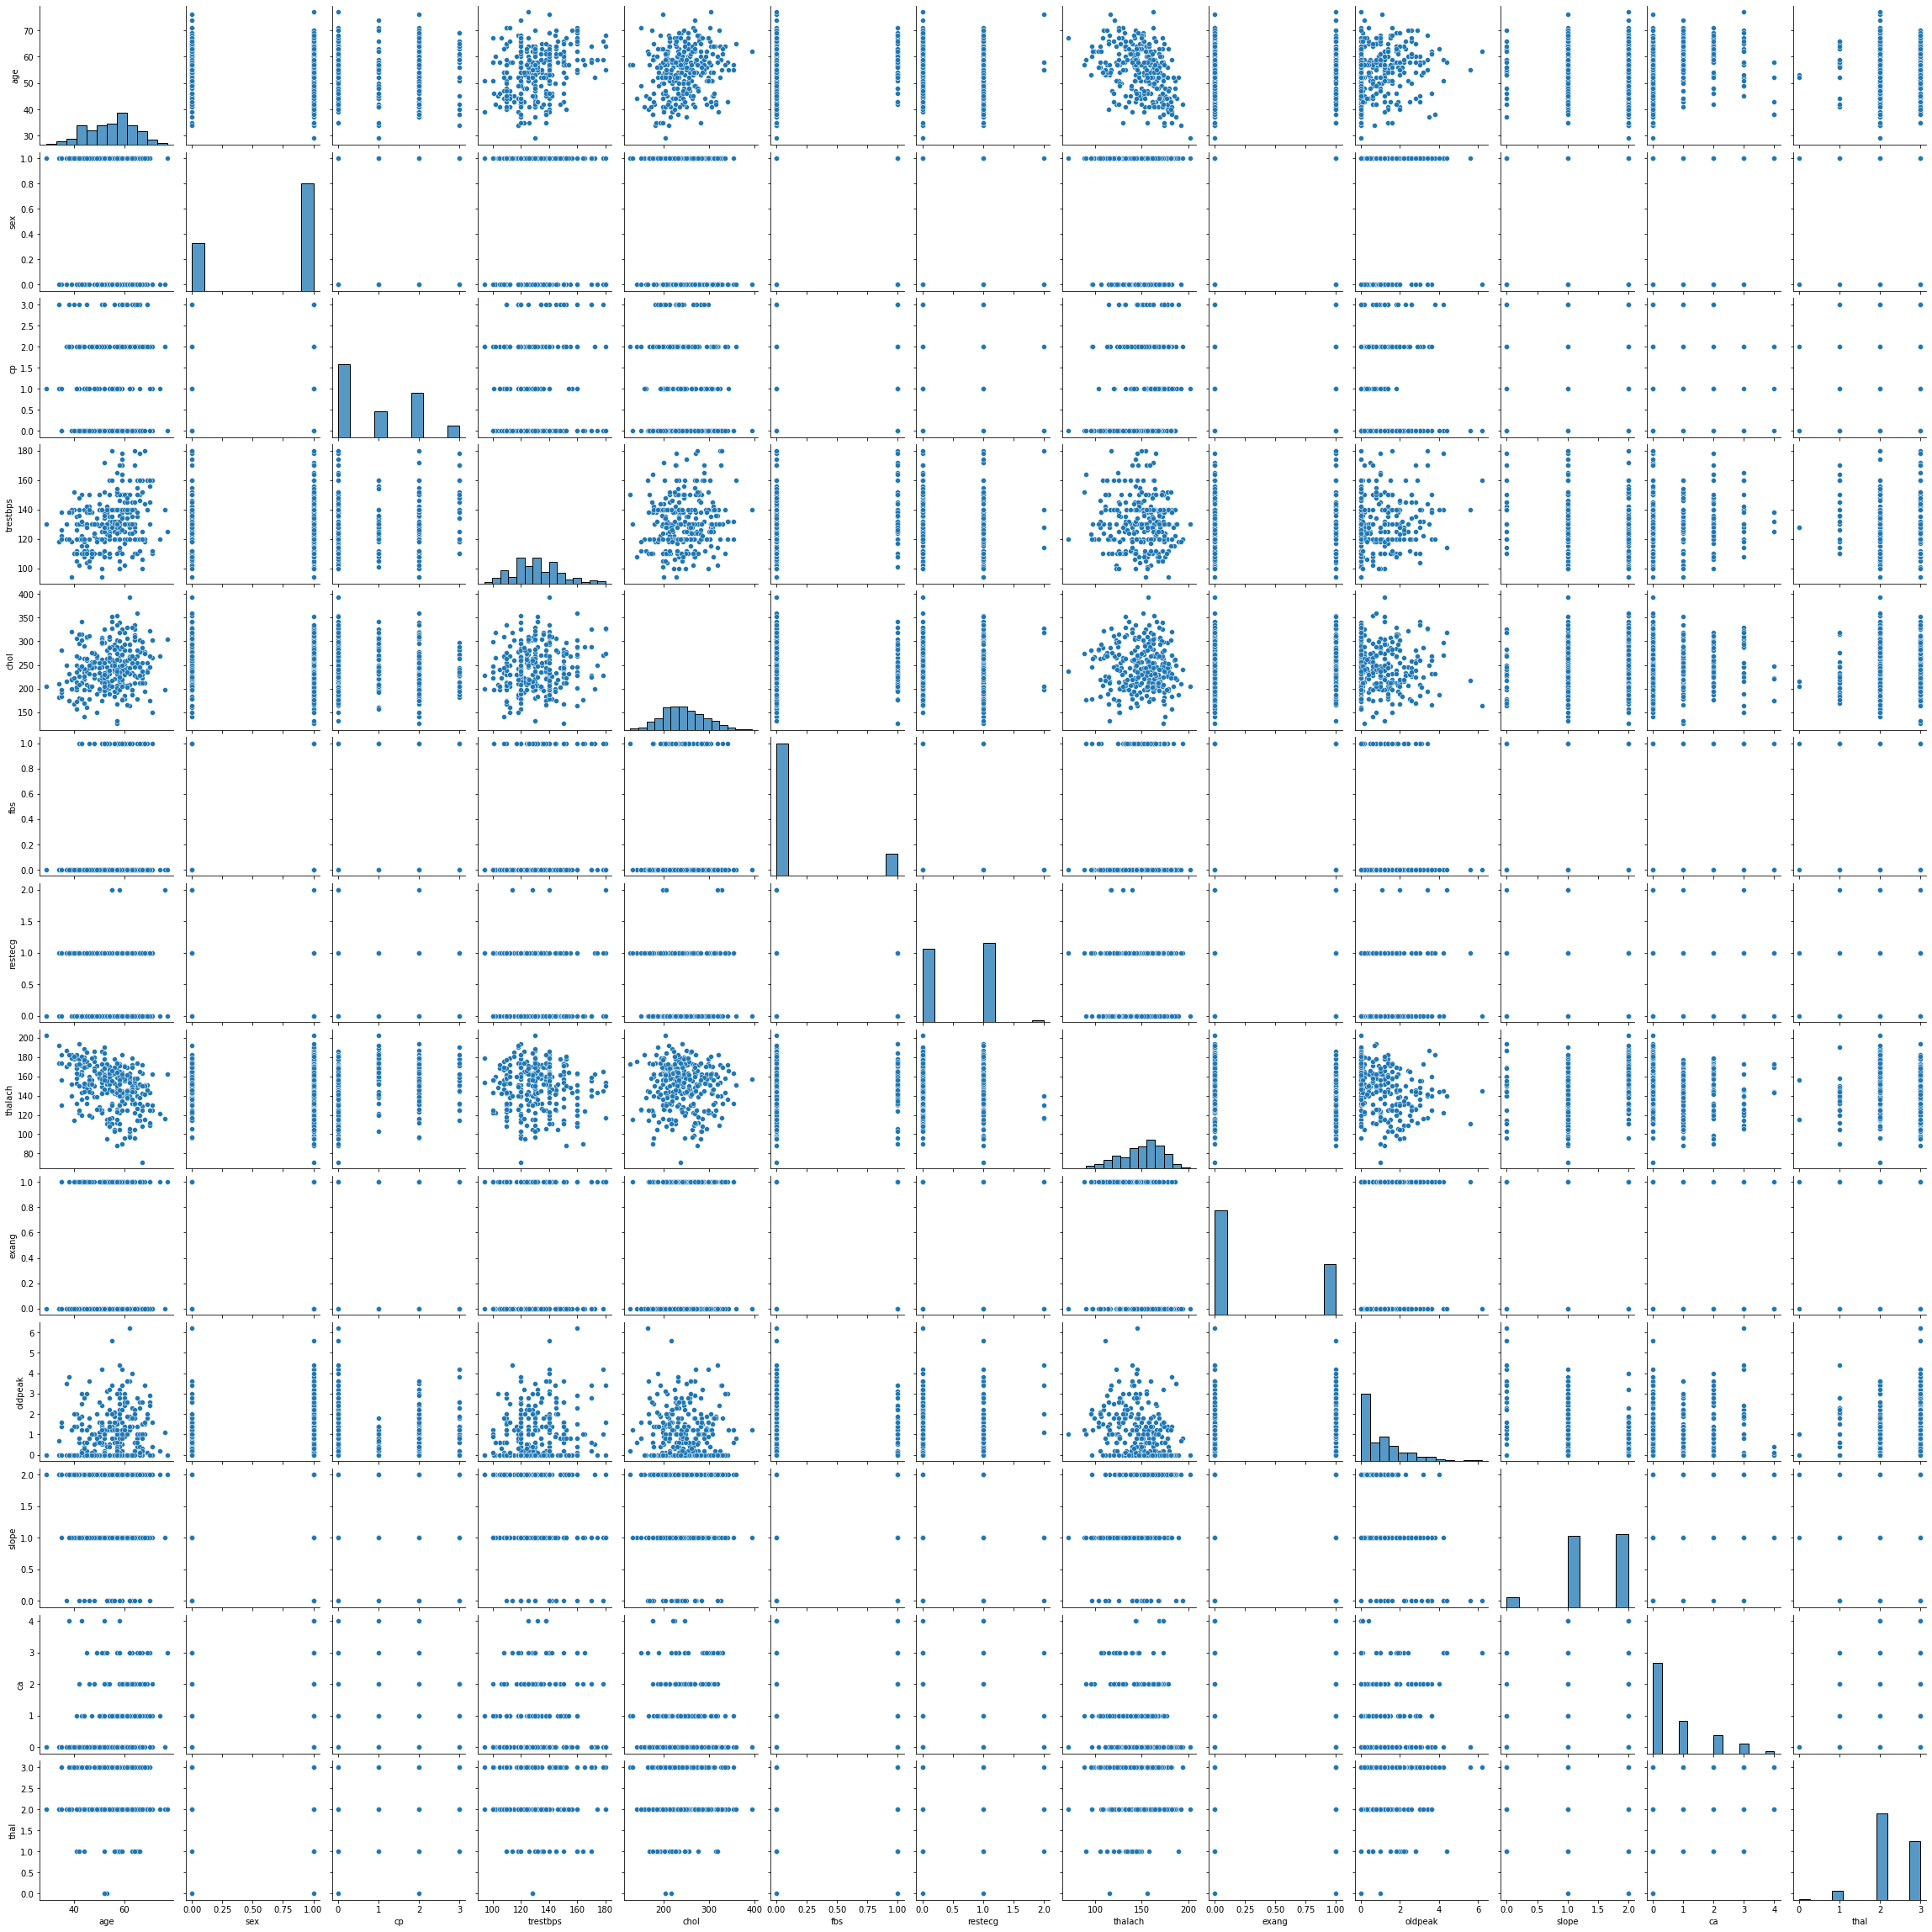

In [54]:
sns.pairplot(df.drop('target',axis=1))
plt.show()

C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


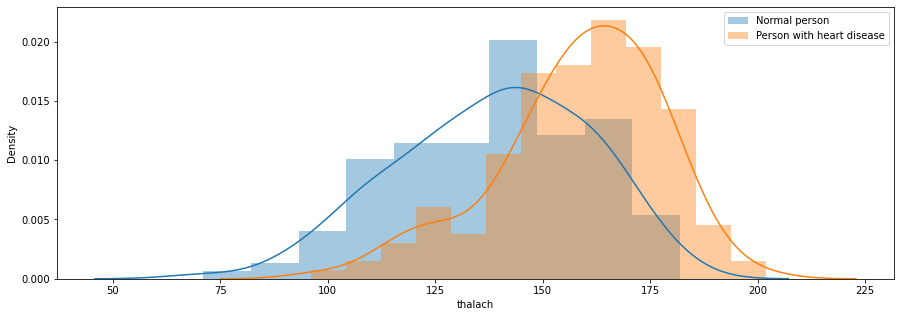

In [55]:
plt.figure(figsize=(15,5))
sns.distplot(df[df.target==0].thalach,label='Normal person')
sns.distplot(df[df.target==1].thalach,label='Person with heart disease')
plt.legend()
plt.show()

**Feature Scaling**

In [56]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [57]:
x = df.drop('target',axis=1)
y = df['target']

In [58]:
x = scale.fit_transform(x)

In [59]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=65)

In [60]:
from sklearn.svm import SVC

# **Applying Linear Kernel**

In [61]:
from sklearn.model_selection import cross_validate,GridSearchCV

In [95]:
grd1 = GridSearchCV(estimator = SVC(kernel='linear'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=5,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid1 = grd1.fit(x,y)

best_parameters = grid1.best_params_
print("The best paramters are for Linear Kernel: \n",best_parameters)


best_model1 = SVC(kernel='linear', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model1, x, y, cv=10, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

The best paramters are for Linear Kernel: 
 {'C': 10, 'coef0': 0.001, 'degree': 1, 'gamma': 'scale'}
Testing accuracy is:  0.8344827586206897


# Applying RBF model

In [98]:
grd2 = GridSearchCV(estimator = SVC(kernel='rbf'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=5,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid2 = grd2.fit(x,y)

best_parameters = grid2.best_params_
print("The best paramters are for RBF Kernel: \n",best_parameters)


best_model2 = SVC(kernel='rbf', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model2, x, y, cv=10, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

The best paramters are for RBF Kernel: 
 {'C': 100, 'coef0': 0.001, 'degree': 1, 'gamma': 'auto'}
Testing accuracy is:  0.8279310344827586


# Applying Polynomial Kernel method

In [99]:
grd3 = GridSearchCV(estimator = SVC(kernel='poly'),
                  param_grid = {
                      'C' :   [0.1,0.01,0.001,1,10,100,1000],
                      'degree' : [1,2,3,4],
                      'coef0' : [0.001,0.0001],
                      'gamma':['scale','auto']
                      
                  }, cv=5,scoring='accuracy',verbose=0,n_jobs=-1)

#fitting into the grid
grid3 = grd3.fit(x,y)

best_parameters = grid2.best_params_
print("The best paramters are for Polynomial Kernel: \n",best_parameters)


best_model3 = SVC(kernel='poly', C=best_parameters["C"], gamma=best_parameters["gamma"], coef0=best_parameters["coef0"], shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1,  probability=True)

scoring = {'accuracy_score': 'accuracy','log_loss_score': 'neg_log_loss'}

scores = cross_validate(best_model3, x, y, cv=10, scoring=scoring, return_train_score = True)

print("Testing accuracy is: ",scores['test_accuracy_score'].mean())

The best paramters are for Polynomial Kernel: 
 {'C': 100, 'coef0': 0.001, 'degree': 1, 'gamma': 'auto'}
Testing accuracy is:  0.831264367816092


**So the best fit kernel is Linear Kernel**